# Analyzing 311

Thiru Satya Surya Mahaveer Bonagiri, Aryaan Upadhyay, Christian DeAsis, Mary Choe

Analyzing 311 Data - Team 3

Begin by extracting data:

In [ ]:
# extracting data
import pandas as pd

df_2010 = pd.read_csv("dataverse_files/311 Cases 2010_2014 Unrestricted.csv")
df_2010.head()


,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,179937,Electrical,101000102011,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Building,Constituent Call,Inspectional Services,303291000.0,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
1,180062,Electrical,101000101931,NaN,"4 Union Park St, Roxbury, MA 02118",2010-01-01,Building,Constituent Call,Inspectional Services,305963000.0,-71.070483,42.342110,85722671.0,2.502507e+14,2.502507e+11,2.502507e+10,South End - Shawmut,South End,NaN,0,0,0,0,0,0,0,0,0
2,222060,Fire in Food Establishment,101000102010,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Health,Constituent Call,Inspectional Services,303291000.0,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
3,244491,General Comments For a Program or Policy,101000101966,2010-01-02,NaN,2010-01-01,Employee & General Comments,Constituent Call,Mayor's 24 Hour Hotline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4,259240,General Lighting Request,101000102004,2010-03-10,"INTERSECTION of Mount Vernon St & Walnut St, B...",2010-01-01,Street Lights,Constituent Call,Public Works Department,NaN,-71.066287,42.358318,85697968.0,NaN,2.502502e+11,2.502502e+10,NaN,NaN,9411.0,1,0,0,0,0,0,0,0,0


In [ ]:
df_2015 = pd.read_csv("dataverse_files/311 Cases 2015_2019 Unrestricted.csv")
df_2015.head()

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,45708,Animal Found,101001240881,NaN,"961 William T Morrissey Blvd, Dorchester, MA ...",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.602538e+09,-71.047358,42.291380,85736402.0,2.502510e+14,2.502510e+11,2.502510e+10,Neponset/Port Norfolk,South Dorchester,NaN,0,0,0,0,0,0,0,0,0
1,45887,Animal Found,101001240807,NaN,"27 Shepard St, Brighton, MA 02135",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.205456e+09,-71.150565,42.347037,85695152.0,2.502500e+14,2.502500e+11,2.502500e+10,Brighton - St Elizabeth's,Allston/Brighton,NaN,0,0,0,0,0,0,0,0,0
2,46110,Animal Found,101001240873,NaN,"834-842 Morton St, Dorchester, MA 02124",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.403860e+09,-71.085420,42.281095,85736344.0,2.502510e+14,2.502510e+11,2.502510e+10,W Codman Hill/W. Lower Mills,Mattapan,NaN,0,0,0,0,0,0,0,0,0
3,46395,Animal Found,101001240750,NaN,"730 Adams St, Dorchester, MA 02122",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.603632e+09,-71.055173,42.284816,85715474.0,2.502510e+14,2.502510e+11,2.502510e+10,Neponset/Port Norfolk,South Dorchester,NaN,0,0,0,0,0,0,0,0,0
4,46468,Animal Found,101001240740,NaN,"4833 Washington St, West Roxbury, MA 02132",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.002788e+09,-71.146118,42.271168,85736327.0,2.502513e+14,2.502513e+11,2.502513e+10,Upper Washington/Spring St,West Roxbury,NaN,0,0,0,0,0,0,0,0,0


In [ ]:
df_2020 = pd.read_csv("dataverse_files/311 Cases 2020_2024 Unrestricted.csv", low_memory=False)
df_2020.head()

,CASE_ENQUIRY_ID,OPEN_DT,SUBJECT,REASON,TYPE,LOCATION,propid,SOURCE,X,Y,LocationID,ObjectID,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,CLOSED_DT
0,101003148635,2020-01-01,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"70 Burbank St, Boston, MA 02115",A162736,Mobile Request,-71.088920,42.344290,4.014760e+08,NaN,639001902.0,2.502501e+14,2.502501e+11,2.502501e+10,Fenway,Fenway/Kenmore,1,0,0,0,0,1,0,1,1,2020-03-12
1,101003148558,2020-01-01,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"461 Gallivan Blvd, Dorchester, MA 02124",A62325,Constituent Call,-71.057980,42.282010,1.605083e+09,NaN,85715454.0,2.502510e+14,2.502510e+11,2.502510e+10,East Lower Mills/Cedar Grove,South Dorchester,1,0,0,0,0,1,0,1,1,2020-01-13
2,101003148571,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",I11942,Mobile Request,-71.057802,42.282298,NaN,6769.0,85715455.0,NaN,2.502510e+11,2.502510e+10,NaN,NaN,1,0,0,0,0,0,0,0,0,2020-01-13
3,101003148542,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"10 Stanbro St, Hyde Park, MA 02136",A130087,Mobile Request,-71.132410,42.235530,1.809755e+09,NaN,85704712.0,2.502514e+14,2.502514e+11,2.502514e+10,Readville,Hyde Park,1,0,0,0,0,0,0,0,0,2020-01-18
4,101003148439,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"8 Pleasanton St, Dorchester, MA 02121",A111359,Mobile Request,-71.087270,42.310860,1.202261e+09,NaN,85701390.0,2.502508e+14,2.502508e+11,2.502508e+10,Washington Park,Roxbury,1,0,0,0,0,0,0,0,0,2020-01-02


Now that we have all three datasets that outline the time period desired, we will merge them into one dataset to perform our analysis. However, to make everything look cleaner and easier to comprehend, we will rearrange the order of the columns in the third dataset (df_2020) such that they match the order of the columns in the first two datasets (df_2010, df_2015), as they have the same column order.

In [ ]:
# rearrange the order of columns in df_2020 to match df_2010 and df_2015

# get the common columns in all three dfs
common_columns = list(set(df_2010.columns).intersection(set(df_2015.columns)).intersection(set(df_2020.columns)))

# rearrange the columns of df_2020 to match the order in df_2010 and df_2015
df_2020 = df_2020[common_columns].reindex(columns=df_2010.columns)

df_2020.head()

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,NaN,Abandoned Bicycle,101003148635,2020-03-12,"70 Burbank St, Boston, MA 02115",2020-01-01,Abandoned Bicycle,Mobile Request,Mayor's 24 Hour Hotline,4.014760e+08,-71.088920,42.344290,639001902.0,2.502501e+14,2.502501e+11,2.502501e+10,Fenway,Fenway/Kenmore,NaN,1,0,0,0,0,1,0,1,1
1,NaN,Abandoned Bicycle,101003148558,2020-01-13,"461 Gallivan Blvd, Dorchester, MA 02124",2020-01-01,Abandoned Bicycle,Constituent Call,Mayor's 24 Hour Hotline,1.605083e+09,-71.057980,42.282010,85715454.0,2.502510e+14,2.502510e+11,2.502510e+10,East Lower Mills/Cedar Grove,South Dorchester,NaN,1,0,0,0,0,1,0,1,1
2,NaN,Abandoned Vehicles,101003148571,2020-01-13,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,NaN,-71.057802,42.282298,85715455.0,NaN,2.502510e+11,2.502510e+10,NaN,NaN,6769.0,1,0,0,0,0,0,0,0,0
3,NaN,Abandoned Vehicles,101003148542,2020-01-18,"10 Stanbro St, Hyde Park, MA 02136",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.809755e+09,-71.132410,42.235530,85704712.0,2.502514e+14,2.502514e+11,2.502514e+10,Readville,Hyde Park,NaN,1,0,0,0,0,0,0,0,0
4,NaN,Abandoned Vehicles,101003148439,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202261e+09,-71.087270,42.310860,85701390.0,2.502508e+14,2.502508e+11,2.502508e+10,Washington Park,Roxbury,NaN,1,0,0,0,0,0,0,0,0


Now that the column orders are the same, we can merge all three datasets into one dataframe.

In [ ]:
# merge all 3 datasets
df = pd.concat([df_2010, df_2015, df_2020])

df.head()

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,179937.0,Electrical,101000102011,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Building,Constituent Call,Inspectional Services,303291000.0,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
1,180062.0,Electrical,101000101931,NaN,"4 Union Park St, Roxbury, MA 02118",2010-01-01,Building,Constituent Call,Inspectional Services,305963000.0,-71.070483,42.342110,85722671.0,2.502507e+14,2.502507e+11,2.502507e+10,South End - Shawmut,South End,NaN,0,0,0,0,0,0,0,0,0
2,222060.0,Fire in Food Establishment,101000102010,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Health,Constituent Call,Inspectional Services,303291000.0,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
3,244491.0,General Comments For a Program or Policy,101000101966,2010-01-02,NaN,2010-01-01,Employee & General Comments,Constituent Call,Mayor's 24 Hour Hotline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4,259240.0,General Lighting Request,101000102004,2010-03-10,"INTERSECTION of Mount Vernon St & Walnut St, B...",2010-01-01,Street Lights,Constituent Call,Public Works Department,NaN,-71.066287,42.358318,85697968.0,NaN,2.502502e+11,2.502502e+10,NaN,NaN,9411.0,1,0,0,0,0,0,0,0,0


In [ ]:
#import os
#df.to_csv("merged_df.csv", index=False)

In [ ]:
# check size (sanity check)
df.size

79496928

In [ ]:
# list all columns in df (sanity check)
column_names = list(df)

print(column_names)

['Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION', 'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT', 'LocationID', 'X', 'Y', 'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD', 'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI', 'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM']


We want to examine the data in which there is no Closed Date, or cases that have not been addressed. We will now extract this data to further examine.

In [ ]:
# retrieve rows that have NaN value for CLOSED_DT
# first create copy of main dataframe
df2 = df.copy()

df2.head()

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,179937.0,Electrical,101000102011,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Building,Constituent Call,Inspectional Services,303291000.0,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
1,180062.0,Electrical,101000101931,NaN,"4 Union Park St, Roxbury, MA 02118",2010-01-01,Building,Constituent Call,Inspectional Services,305963000.0,-71.070483,42.342110,85722671.0,2.502507e+14,2.502507e+11,2.502507e+10,South End - Shawmut,South End,NaN,0,0,0,0,0,0,0,0,0
2,222060.0,Fire in Food Establishment,101000102010,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Health,Constituent Call,Inspectional Services,303291000.0,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
3,244491.0,General Comments For a Program or Policy,101000101966,2010-01-02,NaN,2010-01-01,Employee & General Comments,Constituent Call,Mayor's 24 Hour Hotline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4,259240.0,General Lighting Request,101000102004,2010-03-10,"INTERSECTION of Mount Vernon St & Walnut St, B...",2010-01-01,Street Lights,Constituent Call,Public Works Department,NaN,-71.066287,42.358318,85697968.0,NaN,2.502502e+11,2.502502e+10,NaN,NaN,9411.0,1,0,0,0,0,0,0,0,0


In [ ]:
# get rows with NaN for column CLOSED_DT
df2 = df2[df2['CLOSED_DT'].isnull()]

df2.head()

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,179937.0,Electrical,101000102011,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Building,Constituent Call,Inspectional Services,3.032910e+08,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
1,180062.0,Electrical,101000101931,NaN,"4 Union Park St, Roxbury, MA 02118",2010-01-01,Building,Constituent Call,Inspectional Services,3.059630e+08,-71.070483,42.342110,85722671.0,2.502507e+14,2.502507e+11,2.502507e+10,South End - Shawmut,South End,NaN,0,0,0,0,0,0,0,0,0
2,222060.0,Fire in Food Establishment,101000102010,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Health,Constituent Call,Inspectional Services,3.032910e+08,-71.055286,42.362916,85710019.0,2.502503e+14,2.502503e+11,2.502503e+10,North End/Waterfront,Central,NaN,0,0,0,0,0,0,0,0,0
8,271420.0,General Request,101000101964,NaN,"560-574 Commonwealth Ave, Boston, MA 02215",2010-01-01,General Request,Mobile Request,Mayor's 24 Hour Hotline,NaN,-71.098290,42.348750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
14,271461.0,General Request,101000101941,NaN,"43 Winston Rd, Dorchester, MA 02124",2010-01-01,General Request,Constituent Call,Mayor's 24 Hour Hotline,1.403538e+09,-71.087739,42.285219,639000022.0,2.502510e+14,2.502510e+11,2.502510e+10,Franklin Field South,Mattapan,NaN,0,0,0,0,0,0,0,0,0


In [ ]:
# check size (sanity check)
df2.size

9161796

In [ ]:
# list columns of df2 (sanity check)
column_names2 = list(df2)

print(column_names2)

['Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION', 'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT', 'LocationID', 'X', 'Y', 'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD', 'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI', 'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM']


In [ ]:
# check how many different types of cases exist (sanity check)
pd.value_counts(df2.TYPE)
#df2['TYPE'].unique() - another way to do this (returns longer output)

General Request                             144532
Request for Pothole Repair                   13980
Unsatisfactory Living Conditions             13917
Animal Generic Request                       13568
General Comments For a Program or Policy     13138
                                             ...  
No Price on Gas/Wrong Price                      1
Metrolist Demographic Survey                     1
Special Request                                  1
Summer Jobs Age 14 Plus                          1
News Boxes                                       1
Name: TYPE, Length: 210, dtype: int64

We will now create a bar graph to show the types of cases that these unresolved calls fall into.

NOTE: there are many case types, so the graph, for now, looks very messy. (will fix this later)

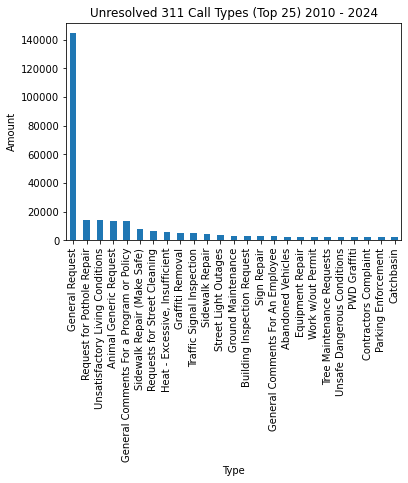

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df2['TYPE'].value_counts().plot(kind = 'bar')
top_types = df2['TYPE'].value_counts().sort_values(ascending=False)[:25]
top_types.plot(kind='bar')

plt.title('Unresolved 311 Call Types (Top 25) 2010 - 2024')
plt.xlabel('Type')
plt.ylabel('Amount') # change title later

# Display the graph
plt.show()

#KEEP THIS FOR NOW, IM STILL NOT SURE WHAT TIMEFRAME WE WANT TO LOOK AT

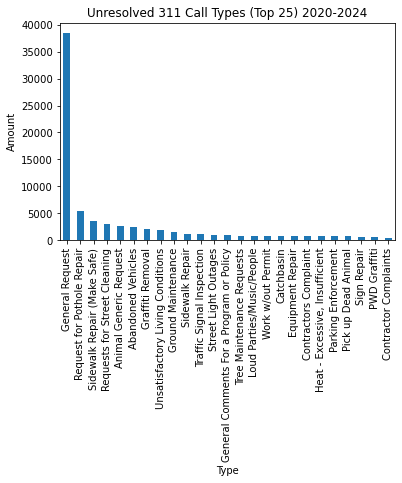

In [ ]:
# using df_2020 dataset:
df_2020_mod = df_2020[df_2020['CLOSED_DT'].isnull()]

top_types = df_2020_mod['TYPE'].value_counts().sort_values(ascending=False)[:25]
top_types.plot(kind='bar')

plt.title('Unresolved 311 Call Types (Top 25) 2020-2024')
plt.xlabel('Type')
plt.ylabel('Amount') # change title later

# Display the graph
plt.show()

In [ ]:
df_2020_mod['Zip Code'] = df_2020_mod['LOCATION'].str.split(' ').str[-1]

df_2020.head()

/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/4179887705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_mod['Zip Code'] = df_2020_mod['LOCATION'].str.split(' ').str[-1]


,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,TLID,BLK_ID_10,BG_ID_10,CT_ID_10,NSA_NAME,BRA_PD,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,NaN,Abandoned Bicycle,101003148635,2020-03-12,"70 Burbank St, Boston, MA 02115",2020-01-01,Abandoned Bicycle,Mobile Request,Mayor's 24 Hour Hotline,4.014760e+08,-71.088920,42.344290,639001902.0,2.502501e+14,2.502501e+11,2.502501e+10,Fenway,Fenway/Kenmore,NaN,1,0,0,0,0,1,0,1,1
1,NaN,Abandoned Bicycle,101003148558,2020-01-13,"461 Gallivan Blvd, Dorchester, MA 02124",2020-01-01,Abandoned Bicycle,Constituent Call,Mayor's 24 Hour Hotline,1.605083e+09,-71.057980,42.282010,85715454.0,2.502510e+14,2.502510e+11,2.502510e+10,East Lower Mills/Cedar Grove,South Dorchester,NaN,1,0,0,0,0,1,0,1,1
2,NaN,Abandoned Vehicles,101003148571,2020-01-13,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,NaN,-71.057802,42.282298,85715455.0,NaN,2.502510e+11,2.502510e+10,NaN,NaN,6769.0,1,0,0,0,0,0,0,0,0
3,NaN,Abandoned Vehicles,101003148542,2020-01-18,"10 Stanbro St, Hyde Park, MA 02136",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.809755e+09,-71.132410,42.235530,85704712.0,2.502514e+14,2.502514e+11,2.502514e+10,Readville,Hyde Park,NaN,1,0,0,0,0,0,0,0,0
4,NaN,Abandoned Vehicles,101003148439,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202261e+09,-71.087270,42.310860,85701390.0,2.502508e+14,2.502508e+11,2.502508e+10,Washington Park,Roxbury,NaN,1,0,0,0,0,0,0,0,0


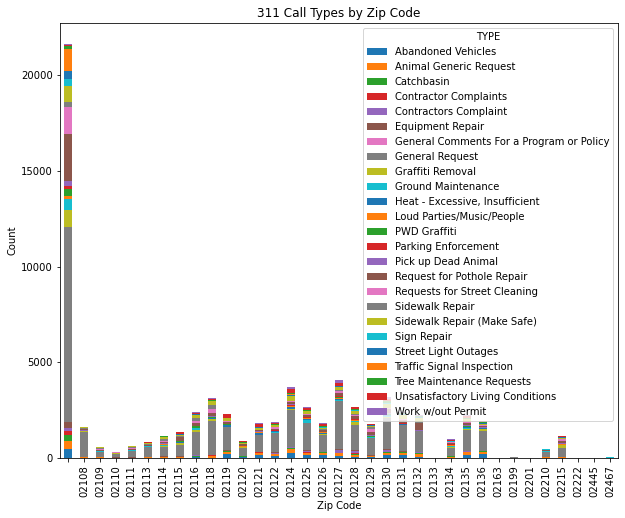

In [ ]:
# bar chart based off zipcode

# Count the number of occurrences of each type
type_counts = df_2020_mod['TYPE'].value_counts()

# select the top 25 types based on their count
top_types = type_counts[:25].index.tolist()

# filter the data to include only the top 25 types
filtered_data = df_2020_mod[df_2020_mod['TYPE'].isin(top_types)]

zip_type_counts = filtered_data.groupby(['Zip Code', 'TYPE']).size().reset_index(name='counts')

# plot the data as a stacked bar chart, with the zip codes on the x-axis and the type counts on the y-axis
zip_type_counts.pivot(index='Zip Code', columns='TYPE', values='counts').plot(kind='bar', stacked=True, figsize=(10, 8))

# set the chart title and axis labels
plt.title('311 Call Types by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Count')

# Display the chart
plt.show()


Text(0, 0.5, 'Proportion')

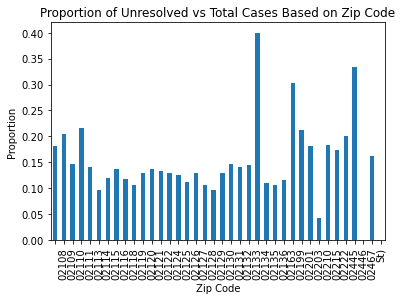

In [ ]:
# extract the zipcodes from the original df_2020
df_2020['Zip Code'] = df_2020['LOCATION'].str.split(' ').str[-1]

# group the dataframes by zip code
df_2020_mod_grouped = df_2020_mod.groupby('Zip Code')
df_2020_grouped = df_2020.groupby('Zip Code')

# count the number of rows (i.e., cases) per zip code
num_cases_mod = df_2020_mod_grouped.size()
num_cases = df_2020_grouped.size()

# calculate the proportion of unresolved cases
prop_unresolved = df_2020_mod_grouped.size() / df_2020_grouped.size()

prop_unresolved.plot(kind='bar')

plt.title('Proportion of Unresolved vs Total Cases Based on Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Proportion')


Now we will display these onto a map for better visualization.

In [ ]:
from folium import Map
import folium

# Map for Poor Conditions of Property
base_map = Map(location=[42.34429, -71.08892],zoom_start=10)
df_2020_map = df_2020[(df_2020['TYPE'] == 'Poor Conditions of Property')]

df_2020_map['X'] = df_2020_map['X'].astype(float)
df_2020_map['Y'] = df_2020_map['Y'].astype(float)
df_2020_map = df_2020_map.dropna(subset=['X', 'Y'])

for i in range(len(df_2020_map)):
    folium.Circle(
        location=[df_2020_map['Y'].values[i], df_2020_map['X'].values[i]],
        radius = 10
    ).add_to(base_map)

base_map.save('Map of Poor Conditions of Property.html')
base_map

/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/3655693437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['X'] = df_2020_map['X'].astype(float)
/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/3655693437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['Y'] = df_2020_map['Y'].astype(float)


In [ ]:
# Map for Major System Failure
base_map = Map(location=[42.34429, -71.08892],zoom_start=10)
df_2020_map = df_2020[(df_2020['TYPE'] == 'Major System Failure')]

df_2020_map['X'] = df_2020_map['X'].astype(float)
df_2020_map['Y'] = df_2020_map['Y'].astype(float)
df_2020_map = df_2020_map.dropna(subset=['X', 'Y'])

for i in range(len(df_2020_map)):
    folium.Circle(
        location=[df_2020_map['Y'].values[i], df_2020_map['X'].values[i]],
        radius = 10
    ).add_to(base_map)

base_map.save('Major System Failure.html')
base_map

/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/3813428062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['X'] = df_2020_map['X'].astype(float)
/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/3813428062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['Y'] = df_2020_map['Y'].astype(float)


In [ ]:
# Map for Illegal Dumping
base_map = Map(location=[42.34429, -71.08892],zoom_start=10)
df_2020_map = df_2020[(df_2020['TYPE'] == 'Illegal Dumping')]

df_2020_map['X'] = df_2020_map['X'].astype(float)
df_2020_map['Y'] = df_2020_map['Y'].astype(float)
df_2020_map = df_2020_map.dropna(subset=['X', 'Y'])

for i in range(len(df_2020_map)):
    folium.Circle(
        location=[df_2020_map['Y'].values[i], df_2020_map['X'].values[i]],
        radius = 10
    ).add_to(base_map)

base_map.save('Illegal Dumping.html')
base_map

/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/1164956147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['X'] = df_2020_map['X'].astype(float)
/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/1164956147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['Y'] = df_2020_map['Y'].astype(float)


In [ ]:
# Map for Alert Boston
base_map = Map(location=[42.34429, -71.08892],zoom_start=10)
df_2020_map = df_2020[(df_2020['TYPE'] == 'Alert Boston')]

df_2020_map['X'] = df_2020_map['X'].astype(float)
df_2020_map['Y'] = df_2020_map['Y'].astype(float)
df_2020_map = df_2020_map.dropna(subset=['X', 'Y'])

for i in range(len(df_2020_map)):
    folium.Circle(
        location=[df_2020_map['Y'].values[i], df_2020_map['X'].values[i]],
        radius = 10
    ).add_to(base_map)

base_map.save('Alert Boston.html')
base_map

/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/4164641886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['X'] = df_2020_map['X'].astype(float)
/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/4164641886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['Y'] = df_2020_map['Y'].astype(float)


In [ ]:
# Map for Late Bus Issues
base_map = Map(location=[42.34429, -71.08892],zoom_start=10)
df_2020_map = df_2020[(df_2020['TYPE'] == 'Late Bus Issues')]

df_2020_map['X'] = df_2020_map['X'].astype(float)
df_2020_map['Y'] = df_2020_map['Y'].astype(float)
df_2020_map = df_2020_map.dropna(subset=['X', 'Y'])

for i in range(len(df_2020_map)):
    folium.Circle(
        location=[df_2020_map['Y'].values[i], df_2020_map['X'].values[i]],
        radius = 10
    ).add_to(base_map)

base_map.save('Late Bus Issues.html')
base_map

/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/2419302402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['X'] = df_2020_map['X'].astype(float)
/var/folders/6y/d5n5pyks3jgckwfhjgjkfy240000gn/T/ipykernel_15584/2419302402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_map['Y'] = df_2020_map['Y'].astype(float)


In [ ]:
import pandas as pd
orig_df = pd.read_csv("dataverse_files/311 Cases 2020_2024 Unrestricted.csv")
df = pd.read_csv("dataverse_files/311 Cases 2020_2024 Unrestricted.csv")
df = df[df['CLOSED_DT'].isnull()]

FileNotFoundError: [Errno 2] No such file or directory: '311_2020_2024.csv'

In [ ]:
columns = ['PUBLIC',
       'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI', 'TRASH',
       'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM']
temp = df.loc[:,columns]
temp_orig = orig_df.loc[:,columns]

In [ ]:
import matplotlib.pyplot as plt

x = temp.sum(axis=0)/temp_orig.sum(axis=0)

fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(x.values, labels=x.index, autopct='%1.1f%%')

ax.set_title('Unresolved requests percentage according to category ')

# show the plot
plt.show()

In [ ]:
x =  df["TYPE"].value_counts()[1:20]
fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(x.values, labels=x.index, autopct='%1.1f%%')

ax.set_title('Unresolved request types avoiding general requests')

# show the plot
plt.show()
plt.savefig('Unresolved_request_types')

In [ ]:
# DONT NEED THIS I DONT THINK BUT IM GOING TO KEEP IT FOR NOW 
# create heatmap
# first based off of location ID, use a geocoding API to convert into latitude and longitude for the addresses
# keep in mind this takes forever
#import geopy
#from geopy.geocoders import Nominatim

# create a geolocator object using the Nominatim API
#geolocator = Nominatim(user_agent="my_app")

# define a function to geocode an address and return the latitude and longitude
#def geocode(address):
#    location = geolocator.geocode(address)
#    if location:
#        return location.latitude, location.longitude
#    else:
#        return None, None

# Apply the geocode function to the location IDs in the merged dataframe
#df2['latitude'], df2['longitude'] = zip(*df2['LocationID'].apply(geocode))

In [ ]:
# create heatmap
import folium
from folium import plugins, Map
from folium.plugins import HeatMap

# map centered on Boston
boston = [42.3601, -71.0589]
heatmap_map = folium.Map(location = boston)

df_2020_mod = df_2020_mod.dropna(subset=['Y', 'X'])
heat_data = [[row['Y'], row['X']] for index, row in df_2020_mod.iterrows()]
HeatMap(heat_data).add_to(heatmap_map)

# display the map (save to html) - think of better file name later
heatmap_map.save('heatmap.html')

In [ ]:
# import pandas as pd
# orig_df = pd.read_csv("311_2020_2024.csv")
# df = pd.read_csv("311_2020_2024.csv")
# df = df[df['CLOSED_DT'].isnull()]

FileNotFoundError: [Errno 2] No such file or directory: '311_2020_2024.csv'